In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

id_list = test_df['PassengerId']


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def feature_normalization(feature_vector):
    # scale to [-1, +1]
    max_value = max(feature_vector)
    min_value = min(feature_vector)
    mean_value = feature_vector.mean()
    return (feature_vector - mean_value) / (max_value - min_value)

def dummy(data, columns):
    for column in columns:
        if column not in data.columns:
            continue
        dummy_data = pd.get_dummies(data[column], drop_first=False)
        num = len(dummy_data.loc[0,:])
        #dummy_data.columns = [column+"_"+str(x+1) for x in range(num)]
        data = pd.concat([data, dummy_data], axis=1)
        data = data.drop(column, axis=1)
    return data


In [5]:
def cabin_extract(data):
    data.Cabin = data.Cabin.fillna('X')
    data.Cabin = data.Cabin.apply(lambda x: str(x)[0])
    data.Cabin = data.Cabin.replace(['A', 'D', 'E', 'T'], 'M')
    data.Cabin = data['Cabin'].replace(['B', 'C'], 'H')
    data.Cabin = data['Cabin'].replace(['F', 'G'], 'L')
    data.Cabin = data.Cabin.map({"X":0, "L":1, "M":2, "H":3}).astype(int)
    return data

In [6]:
train_df = cabin_extract(train_df)
test_df = cabin_extract(test_df)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


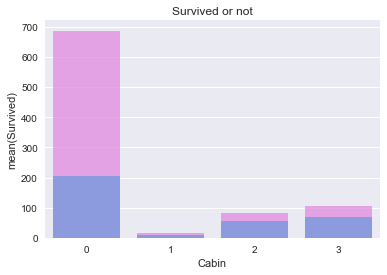

,Fare
Cabin,
0,19.157325
1,17.493135
2,49.281278
3,106.072642


In [8]:
ax = plt.axes()
data = train_df.groupby('Cabin')[['Survived']].count()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='violet', ax=ax)
data = train_df.groupby('Cabin')[['Survived']].sum()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='cornflowerblue', ax=ax)
ax.set_title('Survived or not');
sns.plt.show()

train_df.groupby('Cabin')[['Fare']].mean()

In [9]:
def SexByPclass(data):
    data['Sex'] = data.Sex.map({'female': 1, 'male':0})
    data.Sex = data.Sex.astype(int)
    data.Pclass = data.Pclass.map({1:3, 2:2, 3:1})
    data.loc[data['Sex']==0, 'SexByPclass'] = data.loc[data['Sex']==0, 'Pclass']
    data.loc[data['Sex']==1, 'SexByPclass'] = data.loc[data['Sex']==1, 'Pclass'] + 3
    data['SexByPclass'] = data['SexByPclass'].astype(int)
    return data

In [10]:
#train_df = SexByPclass(train_df)
#test_df = SexByPclass(test_df)

In [11]:
#train_df.head()

In [12]:
temp = pd.crosstab([train_df.SexByPclass,],train_df.Survived.astype(bool))
temp.plot(kind='bar', stacked=True, color = ['violet', 'cornflowerblue'], alpha=0.8, grid=False)

AttributeError: 'DataFrame' object has no attribute 'SexByPclass'

In [13]:
def fill_missing_embarked(data):
    freq_port = data['Embarked'].mode()[0]
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    data['Embarked'] = data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
    return data

In [14]:
train_df = fill_missing_embarked(train_df)
test_df = fill_missing_embarked(test_df)

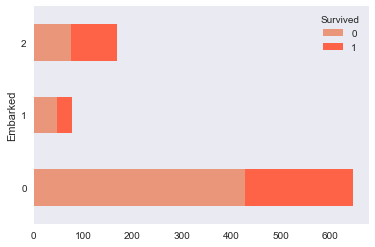

In [15]:
temp = pd.crosstab(train_df.Embarked, train_df.Survived)
temp.plot(kind='barh', stacked=True, color=['darksalmon', 'tomato'], grid=False)

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0


In [17]:
def fare(data):
    data.loc[data.Fare.isnull(), 'Fare'] = data['Fare'].mean()
    data.Fare.astype(int)
    return data

In [18]:
train_df = fare(train_df)
test_df = fare(test_df)

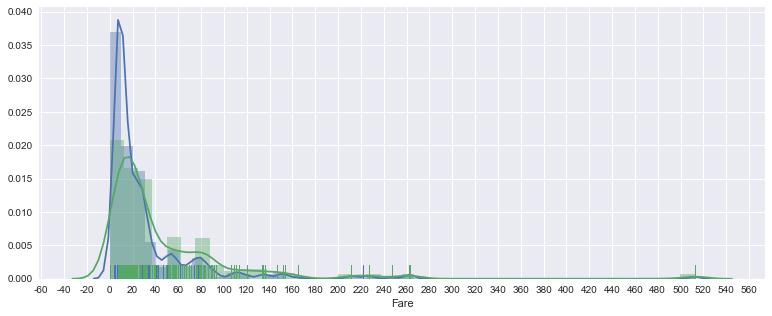

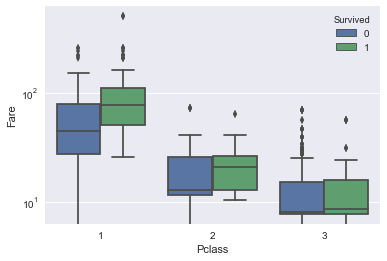

In [19]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

xmajorLocator   = MultipleLocator(20)  # set the major locator to multiples of 5
xmajorFormatter = FormatStrFormatter('%1.0f')

sns.plt.figure(figsize=(13,5))
ax = plt.axes()
sns.distplot(train_df.Fare, kde=True, rug=True)
sns.distplot(train_df.loc[train_df.Survived == 1, 'Fare'], kde=True, rug=True)
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)
sns.plt.show()

ax = sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train_df)
ax.set_yscale('log')
sns.plt.show()



In [20]:
def family_info(data):
    data['FamliySize'] = data['SibSp'] + data['Parch'] + 1
    data['Alone'] = data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)
    data['Alone'] = data['Alone'].astype(int)
    # you should delete linear relation between family-size and sibsp and parch
    return data


In [21]:
train_df = family_info(train_df)
test_df = family_info(test_df)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamliySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1,1


In [23]:
def fill_missing_age(train, test):
    train_dropped = train[['Pclass', 'SibSp', 'Fare', 'Cabin', 'FamliySize', 'Alone', 'Age']]
    test_dropped = test[['Pclass', 'SibSp', 'Fare', 'Cabin', 'FamliySize', 'Alone', 'Age']]
    combine = pd.concat([train_dropped, test_dropped])
    
    age_train = combine[combine.Age.notnull()]
    model = LinearRegression()
    model.fit(age_train.drop(['Age'], axis=1), age_train.Age)
    
    data = combine.loc[combine.Age.isnull()]
    predict_ages = model.predict(data.drop('Age', axis=1))
    combine.loc[combine.Age.isnull(), 'Age'] = predict_ages
    combine['Age'] = combine['Age'].astype(int)
    train['Age'] = combine.iloc[:len(train)]['Age']
    test['Age'] = combine.iloc[len(train):]['Age']
    
    return train, test

train_df, test_df = fill_missing_age(train_df, test_df)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamliySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,3,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,3,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,0,1,1


In [25]:
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [26]:
train_df = dummy(train_df, ['Sex'])
test_df = dummy(test_df, ['Sex'])
train_df = train_df.drop('PassengerId', axis=1)
test_df = test_df.drop('PassengerId', axis=1)
                          

In [27]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,FamliySize,Alone,female,male
0,3,34,0,0,7.8292,0,1,1,1,0,1
1,3,47,1,0,7.0000,0,0,2,0,1,0
2,2,62,0,0,9.6875,0,1,1,1,0,1
3,3,27,0,0,8.6625,0,0,1,1,0,1
4,3,22,1,1,12.2875,0,0,3,0,1,0


In [28]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,FamliySize,Alone,female,male
0,0,3,22,1,0,7.2500,0,0,2,0,0,1
1,1,1,38,1,0,71.2833,3,2,2,0,1,0
2,1,3,26,0,0,7.9250,0,0,1,1,1,0
3,1,1,35,1,0,53.1000,3,0,2,0,1,0
4,0,3,35,0,0,8.0500,0,0,1,1,0,1


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()
model.fit(train_df.drop('Survived', axis=1), train_df.Survived)
predictions = model.predict(test_df)

In [30]:
data_d = {"PassengerId":id_list, "Survived":predictions}
output = pd.DataFrame(data_d)
output.to_csv("predictions.csv", index=False)